<a href="https://colab.research.google.com/github/munozariasjm/MachineLearning/blob/main/NeuralNets_Usefull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Practical Neural Netwoks</center>


---



---



Ya vimos la teoría básica de las redes neuronales, no obstante, necesitamos información práctica del estado del arte y paquetes que nos permitan su aplicación real 

# Neural Nets for Classification


Vamos a utilizar Keras (que a la vez utiliza TensorFlow) para entrenar nuestras redes 

In [21]:

import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
model = ResNet50(weights='imagenet')



Keras asume que cada punto de datos es un vector FILA y que un conjunto de datos de $N$ puntos con $D$ características es una matriz $N\times D$. 

A pesar de que en Keras hay muchísimas formas de hacer la definición de los modelos, vamos a tunear sólo las siguientes características:

* Número y tipo de layer
* Número y tipo de unidad por layer 
* Número de veces que se pasa por los datos ($\textit{epoch}$)

Para las unidades escondidas vamos a utilizar función ReLu, la función de activación va a ser softmax y la de pérdida "categorical_crossentropy"




---



---
Definición del modelo de predicción:


Ingrese path a la imagen/WhatsApp Image 2021-01-15 at 11.21.10 AM.jpeg
Ingrese url


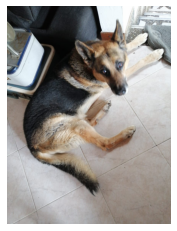

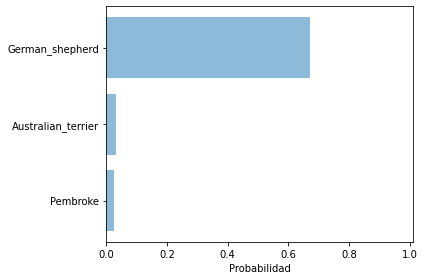

In [43]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from easydict import EasyDict as edict
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
target_size = (224, 224)

def predict(model, img, target_size, top_n=3):
  """Run model prediction on image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
    top_n: # of top predictions to return
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return decode_predictions(preds, top=top_n)[0]

def plot_preds(image, preds):
  """Displays image and the top-n predicted probabilities in a bar graph
  Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure()
  order = list(reversed(range(len(preds))))
  bar_preds = [pr[2] for pr in preds]
  labels = (pr[1] for pr in preds)
  plt.barh(order, bar_preds, alpha=0.5)
  plt.yticks(order, labels)
  plt.xlabel('Probabilidad')
  plt.xlim(0,1.01)
  plt.tight_layout()
  plt.show()

arg1=input("Ingrese path a la imagen")
arg2=input("Ingrese url")

arg = edict({'image':arg1, 'image_url':arg2})

def Classify(args=arg):

  
  if not args.image=="":
    img = Image.open(args.image)
    preds = predict(model, img, target_size)
    plot_preds(img, preds)

  if not args.image_url=="":
    response = requests.get(args.image_url)
    img = Image.open(BytesIO(response.content))
    preds = predict(model, img, target_size)
    plot_preds(img, preds)



Classify()